### Student Information
Name: 周昱宏

Student ID: 108020022

GitHub ID: AnderStudio

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [913]:
### Begin Assignment Here

# ① First Part

完成在 DM2022-Lab1_Master 的專案中，網址連結：https://github.com/AnderStudio/DM2022-Lab1-Master.git

# ② Second Part

## 1. Data Preparation

In [914]:
# categories
categories = ['negative', 'positive']

### 1-1 讀取 amazon_cells_labelled.txt 處理後加進 amazon_data_sentence 與 amazon_data_score

In [915]:
amazon_data_sentence = []
amazon_data_score = []

In [916]:
f = open('sentiment labelled sentences/amazon_cells_labelled.txt')

for line in f.readlines():
    line_split = line.split('	')
    line_split[1] = line_split[1][:len(line_split[1])-1]
    line_split[1] = int(line_split[1])
    amazon_data_sentence.append(line_split[0])
    amazon_data_score.append(line_split[1])
    
f.close

<function TextIOWrapper.close()>

### 1-2 讀取 imdb_labelled.txt 處理後加進 imdb_data_sentence 與 imdb_data_score

In [917]:
imdb_data_sentence = []
imdb_data_score = []

In [918]:
f = open('sentiment labelled sentences/imdb_labelled.txt')

for line in f.readlines():
    line_split = line.split('	')
    line_split[1] = line_split[1][:len(line_split[1])-1]
    line_split[1] = int(line_split[1])
    imdb_data_sentence.append(line_split[0])
    imdb_data_score.append(line_split[1])
    
f.close

<function TextIOWrapper.close()>

### 1-3 讀取 yelp_labelled.txt 處理後加進 yelp_data_sentence 與 yelp_data_score

In [919]:
yelp_data_sentence = []
yelp_data_score = []

In [920]:
f = open('sentiment labelled sentences/yelp_labelled.txt')

for line in f.readlines():
    line_split = line.split('	')
    line_split[1] = line_split[1][:len(line_split[1])-1]
    line_split[1] = int(line_split[1])
    yelp_data_sentence.append(line_split[0])
    yelp_data_score.append(line_split[1])
    
f.close

<function TextIOWrapper.close()>

---

## 2. Data Transformation

### 2-1 把上述六個 list 轉換成 dataframe 

In [921]:
import pandas as pd

# construct dataframe from list
X_amazon = pd.DataFrame({'sentence':amazon_data_sentence, 'score':amazon_data_score})
X_imdb = pd.DataFrame({'sentence':imdb_data_sentence, 'score':imdb_data_score})
X_yelp = pd.DataFrame({'sentence':yelp_data_sentence, 'score':yelp_data_score})

In [922]:
X = pd.concat([X_amazon, X_imdb, X_yelp], ignore_index=True)

In [923]:
len(X)

3000

In [924]:
X[0:2]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [925]:
for t in X["score"][:3]:
    print(t)

0
1
1


---

### 2-2 Adding Columns – 增加從哪個 website 來的 column 及 category_name

In [926]:
# add from which website to the dataframe (0: amazon, 1: imdb, 2: yelp)
X['from'] = [0]*1000 + [1]*1000 + [2]*1000 

In [927]:
# add category label also
X['category_name'] = X.score.apply(lambda t: categories[t])

In [928]:
X[0:10]

,sentence,score,from,category_name
0,So there is no way for me to plug it in here i...,0,0,negative
1,"Good case, Excellent value.",1,0,positive
2,Great for the jawbone.,1,0,positive
3,Tied to charger for conversations lasting more...,0,0,negative
4,The mic is great.,1,0,positive
5,I have to jiggle the plug to get it to line up...,0,0,negative
6,If you have several dozen or several hundred c...,0,0,negative
7,If you are Razr owner...you must have this!,1,0,positive
8,"Needless to say, I wasted my money.",0,0,negative
9,What a waste of money and time!.,0,0,negative


---

### 2-3 Familiarizing yourself with the Data

#### Some Querying Methods

In [929]:
# a simple query
X[:10][["sentence","category_name"]]

,sentence,category_name
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


In [930]:
X[-10:]

,sentence,score,from,category_name
2990,The refried beans that came with my meal were ...,0,2,negative
2991,Spend your money and time some place else.,0,2,negative
2992,A lady at the table next to us found a live gr...,0,2,negative
2993,the presentation of the food was awful.,0,2,negative
2994,I can't tell you how disappointed I was.,0,2,negative
2995,I think food should have flavor and texture an...,0,2,negative
2996,Appetite instantly gone.,0,2,negative
2997,Overall I was not impressed and would not go b...,0,2,negative
2998,"The whole experience was underwhelming, and I ...",0,2,negative
2999,"Then, as if I hadn't wasted enough of my life ...",0,2,negative


In [931]:
# using loc (by label)
X.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [932]:
# using iloc (by position)
X.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [933]:
#Answer here
X['sentence'][:10]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [934]:
# Answer here
X[X['category_name']=='negative'].iloc[::10][0:5]

,sentence,score,from,category_name
0,So there is no way for me to plug it in here i...,0,0,negative
20,I went on Motorola's website and followed all ...,0,0,negative
37,Poor Talk Time Performance.,0,0,negative
60,Essentially you can forget Microsoft's tech su...,0,0,negative
83,The battery runs down quickly.,0,0,negative


---

## 3. Data Mining using Pandas

### 3-1 Check Missing Values

In [935]:
# check missing values
X.isnull()

,sentence,score,from,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


#### 引用助教提供的 helper 中 check_missing_values 函式

In [936]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

In [937]:
X.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,from,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [938]:
# Answer here
X.isnull().apply(lambda x: check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

#### Practice Appending Some Missing Values And Removing Them

In [939]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [940]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [941]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,sentence,score
0,dummy_record,1


In [942]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [943]:
# check if the records was commited into result
len(result_with_series)

3001

In [944]:
result_with_series.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,from,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [945]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [946]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [947]:
len(X)

3001

In [948]:
X.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,from,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [949]:
X.dropna(inplace=True)

In [950]:
X.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,from,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [951]:
len(X)

3000

---

### 3-2 Dealing with Duplicate Data

In [952]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [953]:
sum(X.duplicated())

17

In [954]:
sum(X.duplicated('sentence'))

17

#### 把 duplicated data 移除

In [955]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [956]:
sum(X.duplicated('sentence'))

0

#### Practice Appending Some Duplicated Values And Removing Them

In [957]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'category_name': "positive"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'category_name': "positive"
                        }]

In [958]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [959]:
len(X)

2968

In [960]:
sum(X.duplicated())

1

In [961]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [962]:
len(X)

2966

In [963]:
sum(X.duplicated())

0

---

## 4.  Data Preprocessing


### 4-1 Sampling

In [964]:
X_sample = X.sample(n=1000) #random state

In [965]:
len(X_sample)

1000

In [966]:
X_sample[0:4]

,sentence,score,from,category_name
1807,"Feelings, thoughts...Gabriel's discomfort duri...",1,1.0,positive
570,It plays louder than any other speaker of this...,1,0.0,positive
2412,I'd love to go back.,1,2.0,positive
1706,It handles some tough issues with dignity and ...,1,1.0,positive


Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

#### 分別將原資料與 sample 後的資料 score 分布圖 plot 出來

In [967]:
import matplotlib.pyplot as plt
%matplotlib inline

In [968]:
categories

['negative', 'positive']

negative    1486
positive    1480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

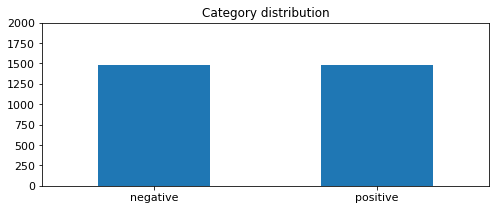

In [969]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

positive    500
negative    500
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

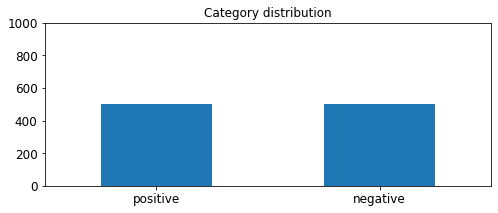

In [970]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 1000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

#### 同時將原資料與 sample 後的資料 score 分布圖 plot 出來

In [971]:
X_value_list = X.category_name.value_counts().tolist()

In [972]:
X_value_list

[1486, 1480]

In [973]:
X_sample_value_list = X_sample.category_name.value_counts().tolist()

In [974]:
X_sample_value_list

[500, 500]

<AxesSubplot:>

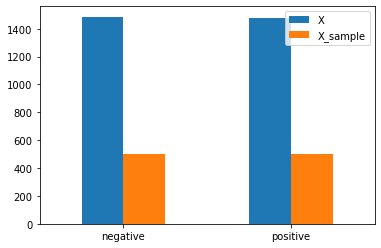

In [975]:
df = pd.DataFrame({'X': X_value_list,
                   'X_sample': X_sample_value_list}, index=['negative', 'positive'])
df.plot.bar(rot=0)

---

### 4-2 Feature Creation

In [976]:
import nltk

#### 引用助教提供的 helper 中 tokenize_text 函式

In [977]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [978]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: tokenize_text(x))

In [979]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [980]:
X[0:4]

,sentence,score,from,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,0.0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,0.0,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,0.0,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,0.0,negative,"[Tied, to, charger, for, conversations, lastin..."


In [981]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

---

### 4-3 Feature subset selection

#### 利用 CountVectorizer 針對資料集進行字詞頻率分析

In [982]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [983]:
count_vect.get_feature_names_out()[4159]

'so'

In [984]:
count_vect.get_feature_names_out()[4543]

'there'

In [985]:
count_vect.get_feature_names_out()[2426]

'is'

In [986]:
count_vect.get_feature_names_out()[3042]

'no'

In [987]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [988]:
analyze(X.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

In [989]:
# We can check the shape of this matrix by:
X_counts.shape

(2966, 5153)

In [990]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [991]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [992]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

#### Use Seaborn Package to Plot Word Frequency Heatmap

In [993]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [994]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [995]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

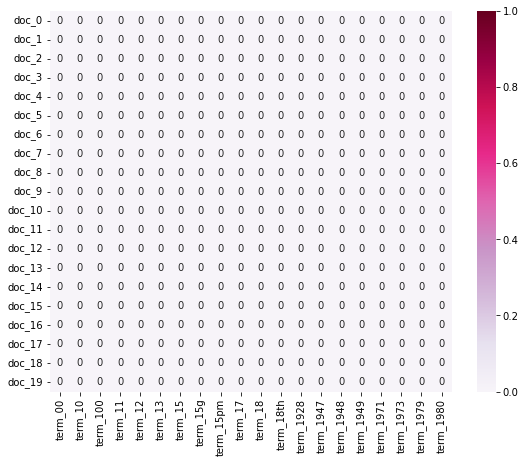

In [996]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Improve Sparse Matrix of Heatmap

In [997]:
import numpy as np

In [998]:
# Answer here
X_counts

<2966x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [999]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]

In [1000]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)]

In [1001]:
plot_z = X_counts.toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [1002]:
drawdf = pd.DataFrame(plot_z, index=plot_y, columns=[plot_x])

In [1003]:
term_frequencie = np.asarray(drawdf.sum(axis=0))

In [1004]:
drawdf.loc[len(drawdf.index)] = term_frequencie

#### 我把特定詞在所有文章中出現頻率小於 150 的移除

In [1005]:
drawdf = drawdf.loc[:,~(drawdf.iloc[2966,:] < 150)]

In [1006]:
drawdf

,term_and,term_are,term_as,term_but,term_film,term_for,term_good,term_great,term_have,term_in,...,term_phone,term_so,term_that,term_the,term_this,term_to,term_very,term_was,term_with,term_you
doc_0,0,0,0,0,0,1,0,0,0,2,...,0,1,0,1,0,1,0,0,0,0
doc_1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_2962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2963,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
doc_2964,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
doc_2965,0,0,1,0,0,0,0,0,0,1,...,0,0,0,3,0,1,0,0,0,0


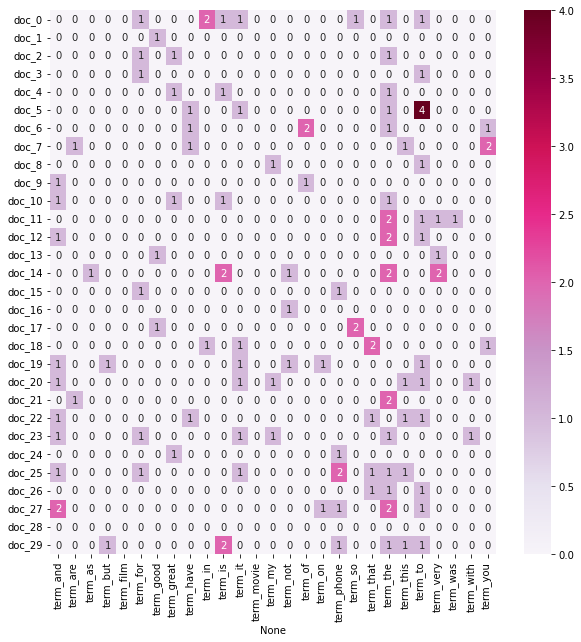

In [1007]:
import seaborn as sns

df_todraw = pd.DataFrame(drawdf.values[0:30], columns = drawdf.columns, index = drawdf.index[0:30])
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=True)

---

### 4.4 Dimensionality Reduction

#### reduce to 2 components

In [1008]:
from sklearn.decomposition import PCA

In [1009]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [1010]:
X_reduced.shape

(2966, 2)

In [1011]:
categories

['negative', 'positive']

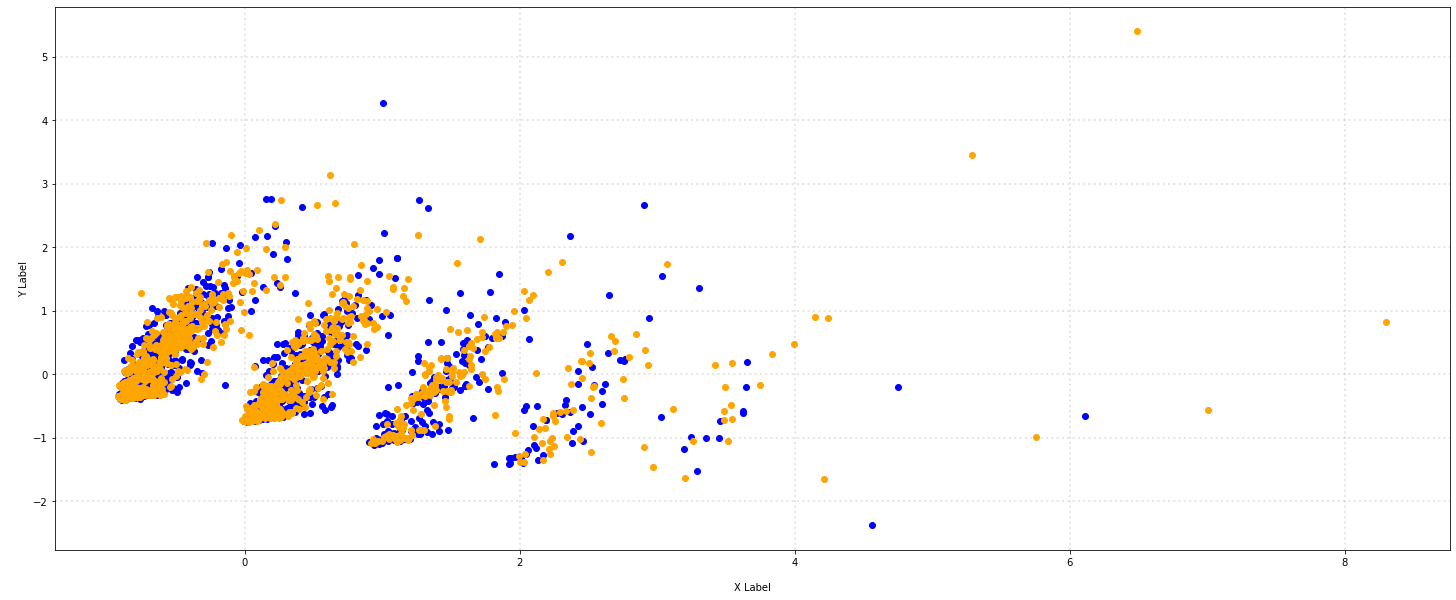

In [1012]:
col = ['blue', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

#### reduce to 3 components

In [1013]:
# Answer here
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [1014]:
X_reduced_3.shape

(2966, 3)

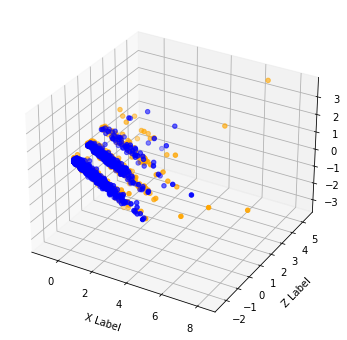

In [1015]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['blue', 'orange']

fig = plt.figure(figsize=(8, 6)) #設定圖示的大小
ax = fig.add_subplot(111, projection='3d') # 111的意思是把畫布分為1行1列，畫在第一個方格內。其實就是整個畫布。

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

---

### 4.5 Attribute Transformation / Aggregation

In [1016]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [1017]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [1018]:
term_frequencies[0] #sum of first term: 00

1

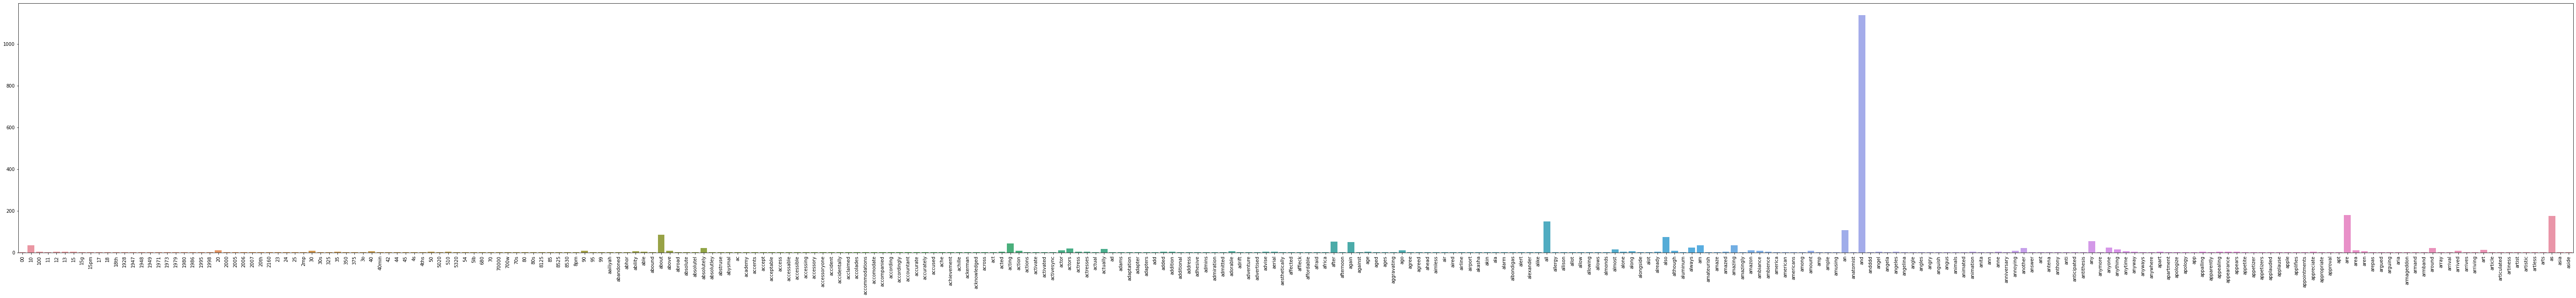

In [1019]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

#### Use Plotly to  print interactive figure

In [1020]:
# Answer here
!pip3 install plotly

In [1021]:
comdf = pd.DataFrame({"words": count_vect.get_feature_names_out()[:300],"freq": term_frequencies[:300]})

In [1022]:
import plotly.express as px
fig = px.bar(comdf, x='words', y='freq')
fig.show()

#### Improve interactive figure - 只 sample 頻率大於等於 150 的 term 

In [1023]:
# Answer here
comdf = pd.DataFrame({"words": count_vect.get_feature_names_out(),"freq": term_frequencies})

In [1024]:
comdf = comdf.drop(comdf[comdf['freq'] < 150].index)

In [1025]:
import plotly.express as px
fig = px.bar(comdf, x='words', y='freq')
fig.show()

#### long-tail figure

In [1026]:
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#### after log figure

In [1027]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

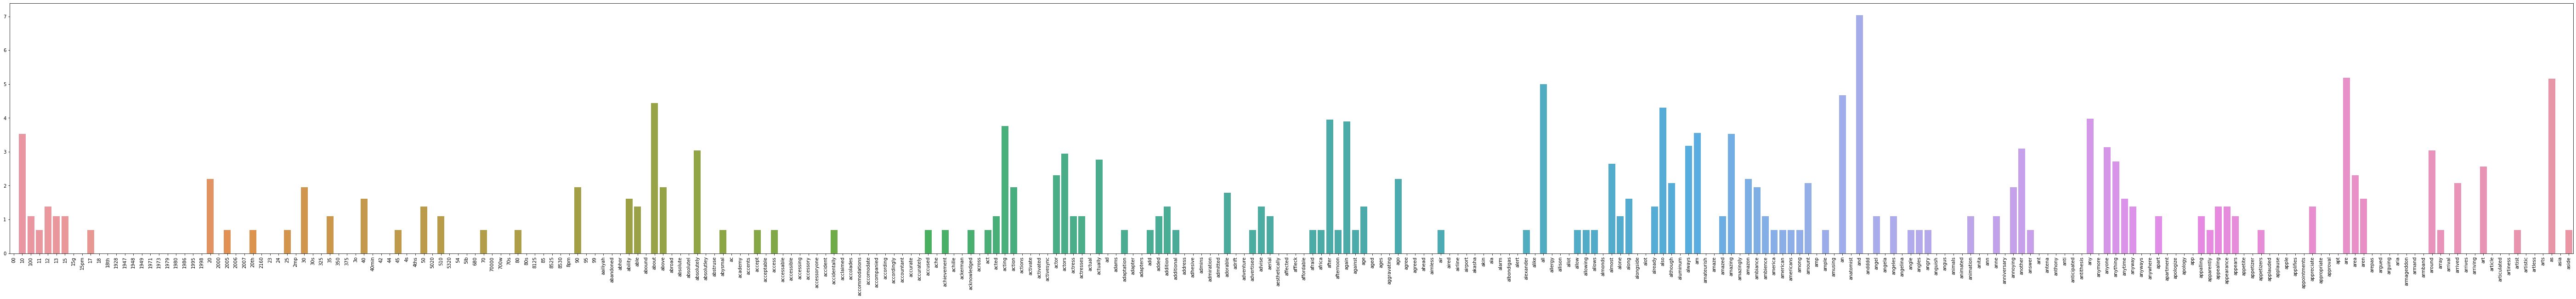

In [1028]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### 4.6 Discretization and Binarization

In [1029]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [1030]:
mlb = preprocessing.LabelBinarizer()

In [1031]:
mlb.fit(X.score)

LabelBinarizer()

In [1032]:
X['bin_category'] = mlb.transform(X['score']).tolist()

In [1033]:
X[0:9]

,sentence,score,from,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,0.0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,0.0,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,0.0,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,0.0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,0.0,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,0.0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,0.0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,0.0,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,0.0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## 5. Data Exploration

In [1034]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [1035]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [1036]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [1037]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# ③ Third Part

## Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

#### 我分別針對 negative 與 positive 的資料進行字詞頻率分析，並分別產生對應的字詞頻率分析圓餅圖，產生結果如下

#### negative 圓餅圖：

In [1038]:
X_negative = X.loc[X['score'] == 0]

In [1039]:
X_negative

,sentence,score,from,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,0.0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
3,Tied to charger for conversations lasting more...,0,0.0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
5,I have to jiggle the plug to get it to line up...,0,0.0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,0.0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
8,"Needless to say, I wasted my money.",0,0.0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
...,...,...,...,...,...,...
2961,I think food should have flavor and texture an...,0,2.0,negative,"[I, think, food, should, have, flavor, and, te...",[0]
2962,Appetite instantly gone.,0,2.0,negative,"[Appetite, instantly, gone, .]",[0]
2963,Overall I was not impressed and would not go b...,0,2.0,negative,"[Overall, I, was, not, impressed, and, would, ...",[0]
2964,"The whole experience was underwhelming, and I ...",0,2.0,negative,"[The, whole, experience, was, underwhelming, ,...",[0]


In [1040]:
from sklearn.feature_extraction.text import CountVectorizer

negative_count_vect = CountVectorizer()
X_negative_counts = negative_count_vect.fit_transform(X_negative.sentence) #learn the vocabulary and return document-term matrix
print(X_negative_counts[0])

  (0, 2596)	1
  (0, 2825)	1
  (0, 1529)	1
  (0, 1911)	1
  (0, 3103)	1
  (0, 1156)	1
  (0, 1759)	1
  (0, 2870)	1
  (0, 2113)	1
  (0, 1532)	1
  (0, 1461)	2
  (0, 1360)	1
  (0, 2814)	1
  (0, 3013)	1
  (0, 2983)	1
  (0, 1253)	1
  (0, 416)	1
  (0, 639)	1


In [1041]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
negative_term_frequencies = []
for j in range(0,X_negative_counts.shape[1]):
    negative_term_frequencies.append(sum(X_negative_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [1042]:
negative_term_frequencies = np.asarray(X_negative_counts.sum(axis=0))[0]

In [1043]:
negative_term_frequencies

array([ 1, 13,  1, ...,  1,  2,  1])

In [1044]:
len(negative_term_frequencies)

3227

In [1045]:
# Answer here
comdf = pd.DataFrame({"words": negative_count_vect.get_feature_names_out(),"freq": negative_term_frequencies})

In [1046]:
comdf = comdf.drop(comdf[comdf['freq'] < 60].index)

In [1047]:
fig = px.pie(comdf, values='freq', names='words',
             title='Word Frequency of Sentence With Negative Sentiment Labelledabelled',
             hover_data=['words'], labels={'words':'freq'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### positive 圓餅圖：

In [1048]:
X_positive = X.loc[X['score'] == 1]

In [1049]:
X_positive

,sentence,score,from,category_name,unigrams,bin_category
1,"Good case, Excellent value.",1,0.0,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,0.0,positive,"[Great, for, the, jawbone, .]",[1]
4,The mic is great.,1,0.0,positive,"[The, mic, is, great, .]",[1]
7,If you are Razr owner...you must have this!,1,0.0,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
10,And the sound quality is great.,1,0.0,positive,"[And, the, sound, quality, is, great, .]",[1]
...,...,...,...,...,...,...
2865,"Overall, a great experience.",1,2.0,positive,"[Overall, ,, a, great, experience, .]",[1]
2867,Their regular toasted bread was equally satisf...,1,2.0,positive,"[Their, regular, toasted, bread, was, equally,...",[1]
2873,The chips and sals a here is amazing!!!!!!!!!!...,1,2.0,positive,"[The, chips, and, sals, a, here, is, amazing, ...",[1]
2875,This is my new fav Vegas buffet spot.,1,2.0,positive,"[This, is, my, new, fav, Vegas, buffet, spot, .]",[1]


In [1050]:
from sklearn.feature_extraction.text import CountVectorizer

positive_count_vect = CountVectorizer()
X_positive_counts = positive_count_vect.fit_transform(X_positive.sentence) #learn the vocabulary and return document-term matrix
print(X_positive_counts[0])

  (0, 1276)	1
  (0, 451)	1
  (0, 1017)	1
  (0, 3146)	1


In [1051]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
positive_term_frequencies = []
for j in range(0,X_positive_counts.shape[1]):
    positive_term_frequencies.append(sum(X_positive_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [1052]:
positive_term_frequencies = np.asarray(X_positive_counts.sum(axis=0))[0]

In [1053]:
positive_term_frequencies

array([21,  2,  1, ...,  1,  3,  1])

In [1054]:
len(positive_term_frequencies)

3342

In [1055]:
# Answer here
comdf = pd.DataFrame({"words": positive_count_vect.get_feature_names_out(),"freq": positive_term_frequencies})

In [1056]:
comdf = comdf.drop(comdf[comdf['freq'] < 60].index)

In [1057]:
fig = px.pie(comdf, values='freq', names='words',
             title='Word Frequency of Sentence With Positive Sentiment Labelledabelled',
             hover_data=['words'], labels={'words':'freq'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### 如此，可以明顯地看出 'the', 'and', 'is', 'it' 等字詞在正面負面句子的出現比率皆是前幾名。然而，負面句子中 'not' 的出現頻率是在第九名，不過在正面句子中卻超出 32 名外。反之正面句子中 'good' 也是類似道理。因此通過此圓餅圖，我們能更清楚針對兩種 score 的特定關鍵字分析，也利後續其他的 preprocessing 

## Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [1058]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vect = TfidfVectorizer()
X_TFIDF = TFIDF_vect.fit_transform(X.sentence)

print(X_TFIDF)

  (0, 1012)	0.3986168387492481
  (0, 646)	0.22333547273087015
  (0, 1981)	0.23146985374950851
  (0, 4791)	0.3320558096799929
  (0, 4833)	0.27546430092514007
  (0, 4529)	0.08650236048704857
  (0, 2157)	0.2227159333830498
  (0, 2313)	0.2951617172401695
  (0, 2431)	0.11953102323931236
  (0, 3385)	0.30874481545976773
  (0, 4607)	0.12738906128503263
  (0, 2808)	0.22860251631494138
  (0, 1828)	0.15661880776106893
  (0, 4985)	0.24912565648943613
  (0, 3042)	0.22333547273087015
  (0, 2426)	0.12069328594000049
  (0, 4543)	0.2075378632582399
  (0, 4159)	0.1873278991359609
  (1, 4859)	0.6332019486974009
  (1, 1602)	0.47347841205424385
  (1, 712)	0.5121812678256109
  (1, 1992)	0.33547553468614605
  (2, 2448)	0.8212989674479607
  (2, 2022)	0.4045808419840924
  (2, 4529)	0.1944627310261341
  :	:
  (2965, 1386)	0.29330546662428275
  (2965, 5108)	0.29330546662428275
  (2965, 3435)	0.29330546662428275
  (2965, 3855)	0.26881739713955227
  (2965, 2067)	0.27898086426066143
  (2965, 588)	0.2443293276548218

## Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

#### Word Frequency Feature-based：

In [1059]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix

In [1060]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = X['score']

X_train, X_test, Y_train, Y_test = train_test_split(X_counts, Y, test_size=0.3, random_state=3) 

mnb_freq = MultinomialNB()
mnb_freq.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Y_result = mnb_freq.predict(X_test)
print(accuracy_score(Y_test, Y_result))

0.8123595505617978


#### TF-IDF Feature-based：

In [1061]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = X['score']

X_train, X_test, Y_train, Y_test = train_test_split(X_TFIDF, Y, test_size=0.3, random_state=3) 

mnb_freq = MultinomialNB()
mnb_freq.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Y_result = mnb_freq.predict(X_test)
print(accuracy_score(Y_test, Y_result))

0.8146067415730337


#### 若針對這兩個 classifier 取相同的訓練集及驗證集（train_test_split 函式中的 random_state 取一樣數字，並測試多次），可以發現這兩種分類器的效果皆 0.8~0.83 之間，效果不差，且兩者的準確率差不多，查閱資料後我發現 Word Frequency 是根據該特定詞在文章中的出現次數，而 TF-IDF 特徵還需額外加權該詞佔整個資料集出現過的文章數比例，因此推測 TF-IDF 中的 IDF 對於這個資料集分類目標影響較小。用字詞的出現頻率做為特徵，已經能達到不錯的準確率，若是再加入其他分析萃取後的特徵，說不定可以進一步增加模型訓練效果。

# ④ Forth Part

In [1062]:
import pandas as pd

# construct dataframe from list
X_amazon = pd.DataFrame({'sentence':amazon_data_sentence, 'score':amazon_data_score})
X_imdb = pd.DataFrame({'sentence':imdb_data_sentence, 'score':imdb_data_score})
X_yelp = pd.DataFrame({'sentence':yelp_data_sentence, 'score':yelp_data_score})

In [1063]:
X = pd.concat([X_amazon, X_imdb, X_yelp], ignore_index=True)

In [1064]:
for idx, boolean in enumerate(X.duplicated()):
    if(boolean == True):
        print(str(X['sentence'][idx]) + " " + str(X['score'][idx]))

Great phone!. 1
Works great. 1
Works great!. 1
Don't buy this product. 0
If you like a loud buzzing to override all your conversations, then this phone is for you! 0
Does not fit. 0
This is a great deal. 1
Great Phone. 1
Excellent product for the price. 1
Great phone. 1
Definitely worth checking out.   1
Not recommended.   0
10/10   1
I love this place. 1
The food was terrible. 0
I won't be back. 0
I would not recommend this place. 0


#### 我認為在處理 duplicated data 時，按照這份資料集（上方輸出是 duplicated data），可以不要把兩個同時出現的資料元素同時砍掉，保留其中一份 data 在訓練資料中 （作法是將下方 drop_duplicates 函式中的 keep 參數改成 'first'）。特別是在訓練資料集數量較匱乏且 duplicated data 數量較多時，可以此實驗。（底下附上調整後的模型結果，效果維持）

In [1065]:
X.drop_duplicates(keep='first', inplace=True)

In [1066]:
len(X)

2983

In [1067]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix

In [1068]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = X['score']

X_train, X_test, Y_train, Y_test = train_test_split(X_counts, Y, test_size=0.3, random_state=3) 

mnb_freq = MultinomialNB()
mnb_freq.fit(X_train, Y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Y_result = mnb_freq.predict(X_test)
print(accuracy_score(Y_test, Y_result))

0.8156424581005587
